# Heart disease prediction

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Heart Disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


**Step 2: Data Cleaning and Transformation**

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()

categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'AgeCategory', 'Race'], drop_first=True)

# Convert 'HeartDisease' column to binary (1: Yes, 0: No)
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for missing values and handle them if necessary
print(df.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


HeartDisease               0
BMI                        0
Smoking                    0
AlcoholDrinking            0
Stroke                     0
PhysicalHealth             0
MentalHealth               0
DiffWalking                0
Diabetic                   0
PhysicalActivity           0
GenHealth                  0
SleepTime                  0
Asthma                     0
KidneyDisease              0
SkinCancer                 0
Sex_Male                   0
AgeCategory_25-29          0
AgeCategory_30-34          0
AgeCategory_35-39          0
AgeCategory_40-44          0
AgeCategory_45-49          0
AgeCategory_50-54          0
AgeCategory_55-59          0
AgeCategory_60-64          0
AgeCategory_65-69          0
AgeCategory_70-74          0
AgeCategory_75-79          0
AgeCategory_80 or older    0
Race_Asian                 0
Race_Black                 0
Race_Hispanic              0
Race_Other                 0
Race_White                 0
dtype: int64


In [6]:
#Balance the Classes 
from imblearn.under_sampling import RandomUnderSampler
# Separate features and target variable
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


# Feature Importance Analysis using Random Forest Algorithm

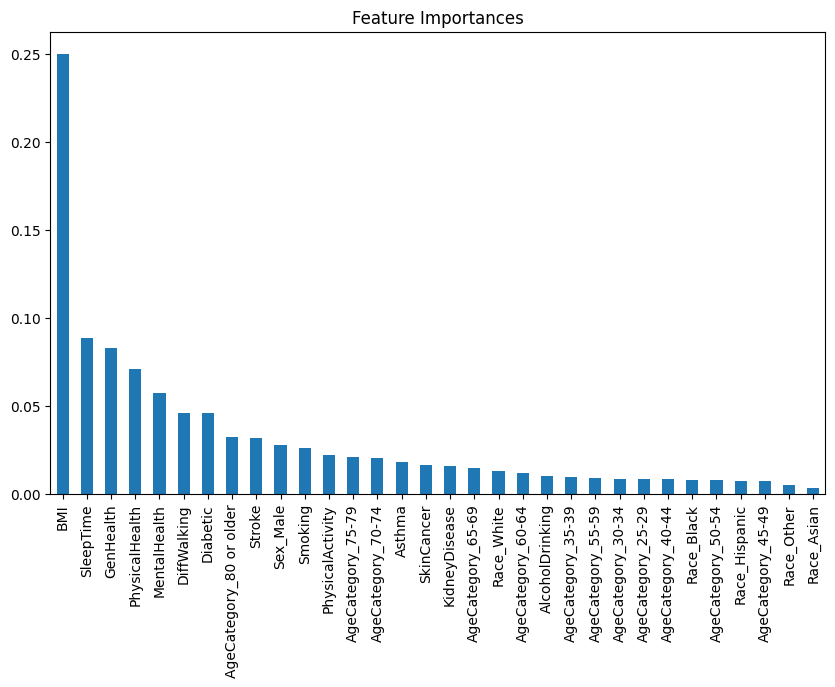

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()


In [8]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Display feature importances for each feature
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")


BMI: 0.24998687657774185
Smoking: 0.02580079369880715
AlcoholDrinking: 0.010115646820653376
Stroke: 0.03172207341610943
PhysicalHealth: 0.07062566568725773
MentalHealth: 0.05703398662716758
DiffWalking: 0.045803668267112796
Diabetic: 0.04578144136554184
PhysicalActivity: 0.021788629648701555
GenHealth: 0.08258191623639496
SleepTime: 0.08835591082241832
Asthma: 0.017983394885969166
KidneyDisease: 0.01569603185583427
SkinCancer: 0.016455363436270805
Sex_Male: 0.027386041440083116
AgeCategory_25-29: 0.008261480150986107
AgeCategory_30-34: 0.008481492140481467
AgeCategory_35-39: 0.009492024831500849
AgeCategory_40-44: 0.008019195675318277
AgeCategory_45-49: 0.007288708173907364
AgeCategory_50-54: 0.00765167145469494
AgeCategory_55-59: 0.00899632768447815
AgeCategory_60-64: 0.011764394507596053
AgeCategory_65-69: 0.014496384222314803
AgeCategory_70-74: 0.020000565514930204
AgeCategory_75-79: 0.020701378315599105
AgeCategory_80 or older: 0.03198227318507571
Race_Asian: 0.0029420973449941147


**FEATURE ANALYSIS:**

1.   BMI
2.   PhysicalHealth
3.   GenHealth
4.   SleepTime
5.   MentalHealth
6.   AgeCategory_80 or older
7.   DiffWalking
8.   AgeCategory_70-74
9.   AgeCategory_75-79
10.   AgeCategory_60-64
11.   Stroke
12.   Diabetic


These features have relatively higher importance values and are likely to have a more significant effect on the likelihood of heart disease based on the Random Forest analysis.


**Logistic Regression, SVM Classifier, K Neighbors Classifier, XGB Classifier, AdaBoost Classifier, Random Forest Classifier, Decision Tree Classifier, MLP Classifier**

In [9]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [10]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n{'='*50}\n") #0: No Heart Disease, 1: Heart Disease


Classifier: Logistic Regression
Accuracy: 0.7542
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5434
           1       0.75      0.77      0.76      5516

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950


Classifier: SVM
Accuracy: 0.7602
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5434
           1       0.74      0.82      0.77      5516

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950


Classifier: k-Nearest Neighbors
Accuracy: 0.7272
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      5434
           1       0.73      0.73  

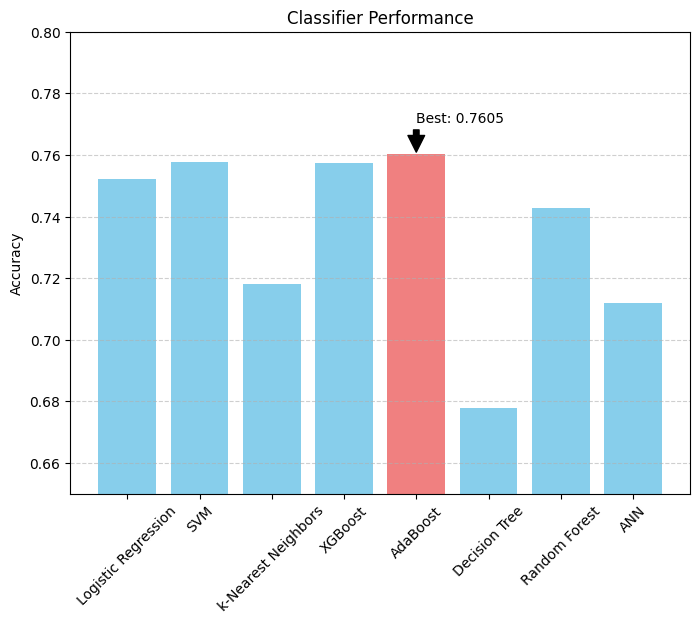

In [11]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = ['Logistic Regression', 'SVM', 'k-Nearest Neighbors', 'XGBoost', 'AdaBoost', 'Decision Tree', 'Random Forest', 'ANN']
accuracies = [0.7522, 0.7579, 0.7183, 0.7574, 0.7605, 0.6778, 0.7429, 0.7119]

# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['skyblue'] * len(classifiers)
colors[best_index] = 'lightcoral'

# Create a vertical bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.65, 0.8)  # Adjusted limits to better fit the Decision Tree accuracy
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add text annotation for the best accuracy
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()
